In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

In [2]:
zip = ZipFile('PeNSE_2015_AMOSTRA2.zip')
# da lista acima vamos pegar o segundo arquivo e atribuir a uma variável bem descritiva
caminho_arquivo_zipado = zip.namelist()[1]
# agora usamos o método open e passamos o 'endereço' para abrir o arquivo
dados = pd.read_csv(zip.open(caminho_arquivo_zipado), sep=';', thousands='.', decimal=',')
dados.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,299.735235,1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,355.170081,1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,299.735235,1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,355.170081,1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,299.735235,1,2,4,1,5,1,296


In [3]:
dados["IMC"] = dados["VB17003"] / ((dados["VB17004"]/100)**2)
dados["IMC"]

0        15.051321
1        21.727839
2        18.502907
3        23.322831
4        28.122076
           ...    
16551    20.113223
16552    17.930782
16553    23.968489
16554    18.995343
16555    23.303246
Name: IMC, Length: 16556, dtype: float64

## <font color=green>1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [4]:
media = dados["IMC"].mean()
print(media)

20.95825220663186


## <font color=green>2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

<br>

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

<br>

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

In [8]:
# calculando a mediana com python
mediana = dados["IMC"].median()
print(mediana)

20.190504330368643


>Ou seja, 50% dos meus elementos estão abaixo desse número e os outros 50% estão acima

## <font color=green>3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

In [13]:
# calculando moda com python
moda = dados["IMC"].mode()
print(moda)

0     16.155478
1     16.718248
2     17.312886
3     18.543714
4     18.556681
5     18.602766
6     19.021555
7     19.169550
8     19.297399
9     19.707910
10    21.082813
dtype: float64


## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

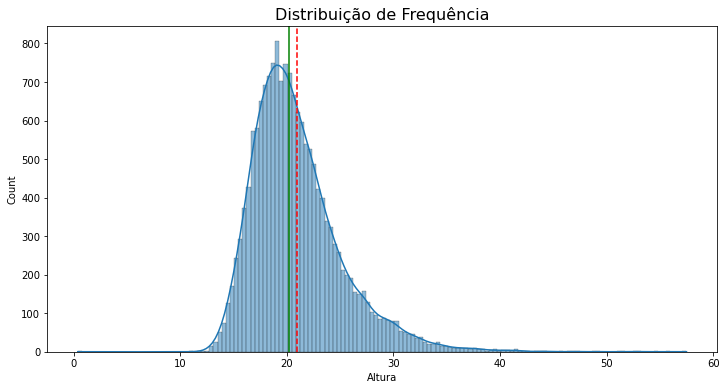

In [21]:
# plotando um histograma e as medidas acima com python
ax = sns.histplot(x='IMC', data=dados, kde=True)
ax.figure.set_size_inches(12, 6)
ax.axvline(dados["IMC"].mean(), color='r', linestyle='--')
ax.axvline(dados["IMC"].median(), color='g', linestyle='-')

ax.set_title("Distribuição de Frequência", fontsize=16)
ax.set_xlabel("Altura")
ax;

Agora vamos visualizar os mesmos dados acima utilizando o boxplot.

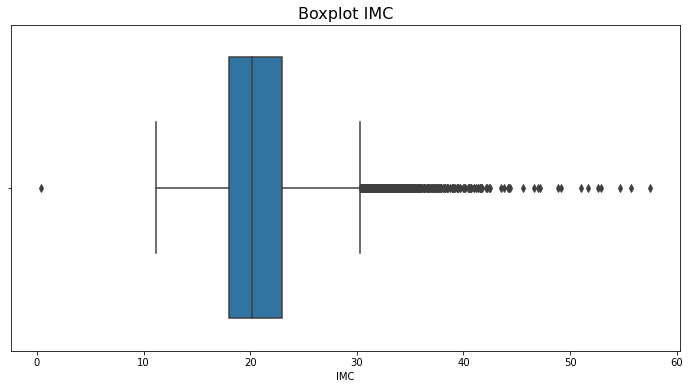

In [24]:
ax = sns.boxplot(x="IMC", data=dados)
ax.figure.set_size_inches(12, 6)
ax.set_title("Boxplot IMC", fontsize=16)
ax.set_xlabel("IMC")
ax;

>Assim como o histograma, o boxplot também nos informa uma assimetria à direita. Veja que o espaço à direita da mediana é ligeiramente maior que o da esquerda.

>Vejamos abaixo como se dá essa relação.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>